In [1]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_excel("/content/COVID19_Full_Data.xlsx")

In [3]:
print(df.head())

       Country  Year  Total Cases  Total Deaths  Male Cases  Female Cases  \
0  Afghanistan  2020     46610597        658913    21581443      25029154   
1  Afghanistan  2021     44066301        872020    23607082      20459219   
2  Afghanistan  2022     44979415        493391    20410475      24568940   
3  Afghanistan  2023     39938970        774949    21952426      17986544   
4      Albania  2020      6553943        122613     3588059       2965884   

   0-18 years  19-40 years  41-60 years  60+ years  
0     2705889     14445903     13204007   16254798  
1     5077272     13453737     11130695   14404597  
2     4870708     17865117     13574907    8668683  
3     3701432     15287238     12222373    8727927  
4      385616      2303856      1770272    2094199  


In [4]:
df.head()

,Country,Year,Total Cases,Total Deaths,Male Cases,Female Cases,0-18 years,19-40 years,41-60 years,60+ years
0,Afghanistan,2020,46610597,658913,21581443,25029154,2705889,14445903,13204007,16254798
1,Afghanistan,2021,44066301,872020,23607082,20459219,5077272,13453737,11130695,14404597
2,Afghanistan,2022,44979415,493391,20410475,24568940,4870708,17865117,13574907,8668683
3,Afghanistan,2023,39938970,774949,21952426,17986544,3701432,15287238,12222373,8727927
4,Albania,2020,6553943,122613,3588059,2965884,385616,2303856,1770272,2094199


In [5]:
df.shape

(876, 10)

In [6]:
df.describe()

,Year,Total Cases,Total Deaths,Male Cases,Female Cases,0-18 years,19-40 years,41-60 years,60+ years
count,876.000000,8.760000e+02,876.000000,8.760000e+02,8.760000e+02,8.760000e+02,8.760000e+02,8.760000e+02,8.760000e+02
mean,2021.500000,2.588724e+07,258687.286530,1.296979e+07,1.291745e+07,2.577689e+06,9.078682e+06,7.735934e+06,6.494937e+06
std,1.118673,1.436573e+07,217462.603103,7.278381e+06,7.185666e+06,1.673010e+06,5.101279e+06,4.342924e+06,3.897857e+06
min,2020.000000,4.447200e+04,171.000000,2.191100e+04,2.256100e+04,4.945000e+03,1.340900e+04,1.392500e+04,9.244000e+03
25%,2020.750000,1.366867e+07,77847.000000,6.754438e+06,6.739403e+06,1.208280e+06,4.725780e+06,4.006518e+06,3.212726e+06
50%,2021.500000,2.592704e+07,207027.000000,1.289764e+07,1.299408e+07,2.343885e+06,9.204492e+06,7.655998e+06,6.309037e+06
75%,2022.250000,3.843397e+07,386531.250000,1.950523e+07,1.880954e+07,3.704105e+06,1.342765e+07,1.143116e+07,9.166846e+06
max,2023.000000,4.997676e+07,953232.000000,2.707945e+07,2.694427e+07,7.334264e+06,1.922175e+07,1.733302e+07,1.744191e+07


In [7]:
df.fillna(0, inplace=True)

In [8]:
def remove_outliers_zscore(df, col, threshold=3):
    mean_col = df[col].mean()
    std_col = df[col].std()
    df = df[(np.abs((df[col] - mean_col) / std_col) < threshold)]
    return df

# only remove outliers from the columns that need them.
for col in ['Total Deaths', 'Total Cases']:
    df = remove_outliers_zscore(df, col)

In [9]:
X = df[['Year', 'Total Cases']]
y_classification = df['Total Deaths'] > df['Total Deaths'].median()
y_regression = df['Total Deaths']

In [10]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_cls = scaler.fit_transform(X_train_cls)
X_test_cls = scaler.transform(X_test_cls)
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

In [12]:
clf_rf = RandomForestClassifier(n_estimators=200, random_state=42)
clf_rf.fit(X_train_cls, y_train_cls)
y_pred_cls_rf = clf_rf.predict(X_test_cls)
print("Random Forest Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls_rf))

clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf_xgb.fit(X_train_cls, y_train_cls)
y_pred_cls_xgb = clf_xgb.predict(X_test_cls)
print("XGBoost Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls_xgb))

clf_svm = SVC(kernel='rbf', C=1)
clf_svm.fit(X_train_cls, y_train_cls)
y_pred_cls_svm = clf_svm.predict(X_test_cls)
print("SVM Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls_svm))

Random Forest Classification Accuracy: 0.6571428571428571
XGBoost Classification Accuracy: 0.6857142857142857
SVM Classification Accuracy: 0.7771428571428571


In [13]:
reg_rf = RandomForestRegressor(n_estimators=200, random_state=42)
reg_rf.fit(X_train_reg, y_train_reg)
y_pred_reg_rf = reg_rf.predict(X_test_reg)
print("Random Forest Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_rf)))

reg_xgb = XGBRegressor()
reg_xgb.fit(X_train_reg, y_train_reg)
y_pred_reg_xgb = reg_xgb.predict(X_test_reg)
print("XGBoost Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_xgb)))

reg_svm = SVR(kernel='rbf', C=1)
reg_svm.fit(X_train_reg, y_train_reg)
y_pred_reg_svm = reg_svm.predict(X_test_reg)
print("SVM Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_svm)))

Random Forest Regression RMSE: 186477.28810849797
XGBoost Regression RMSE: 196942.75667817795
SVM Regression RMSE: 201133.84717949285


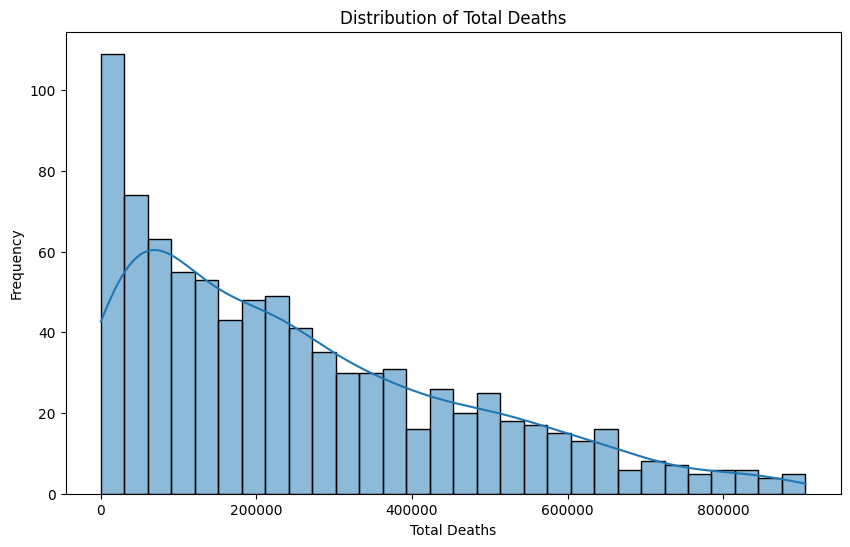

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Deaths'], bins=30, kde=True)
plt.title("Distribution of Total Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("Frequency")
plt.show()

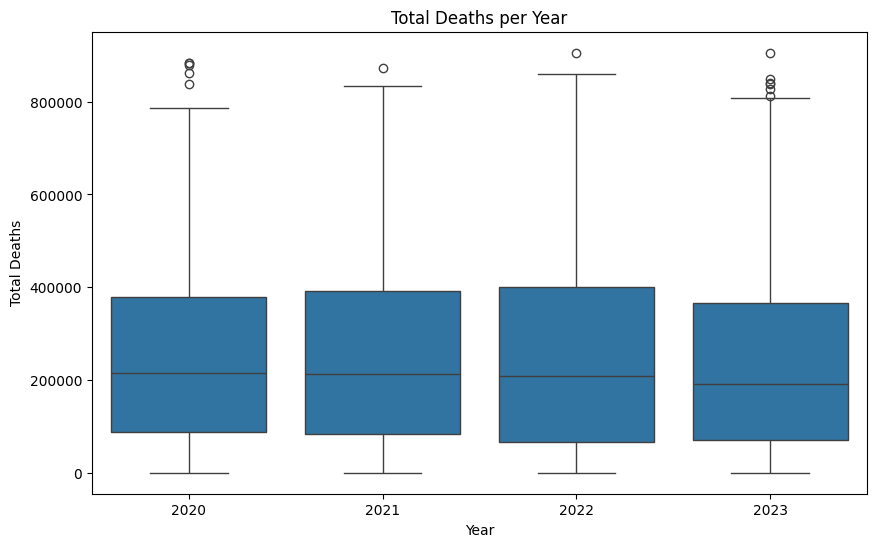

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Total Deaths', data=df)
plt.title("Total Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.show()

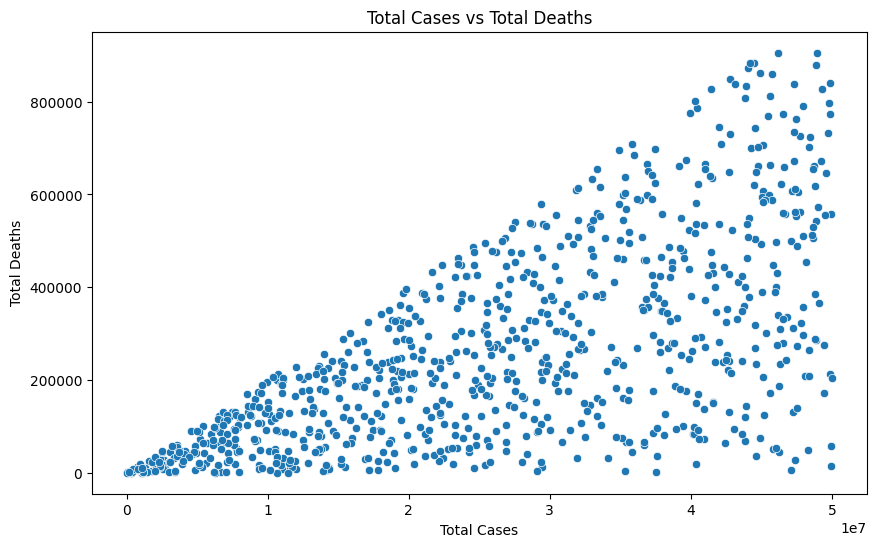

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Total Cases'], y=df['Total Deaths'])
plt.title("Total Cases vs Total Deaths")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()

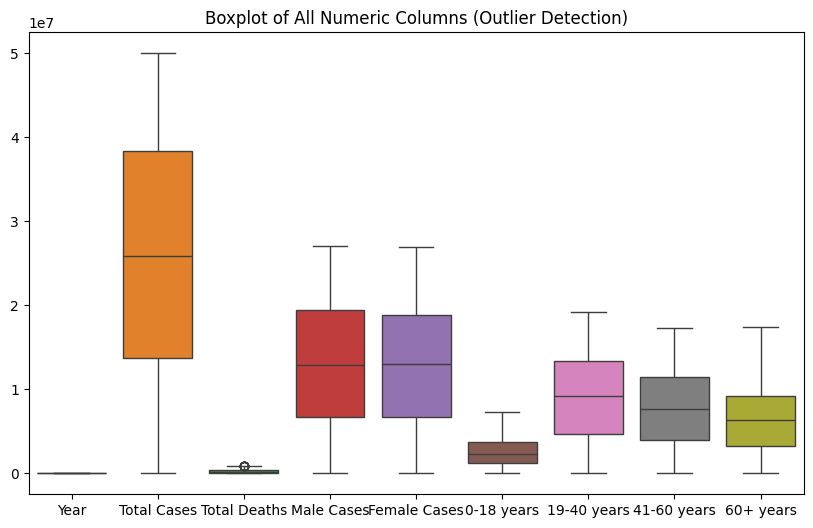

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of All Numeric Columns (Outlier Detection)')
plt.show()

<Figure size 1000x600 with 0 Axes>

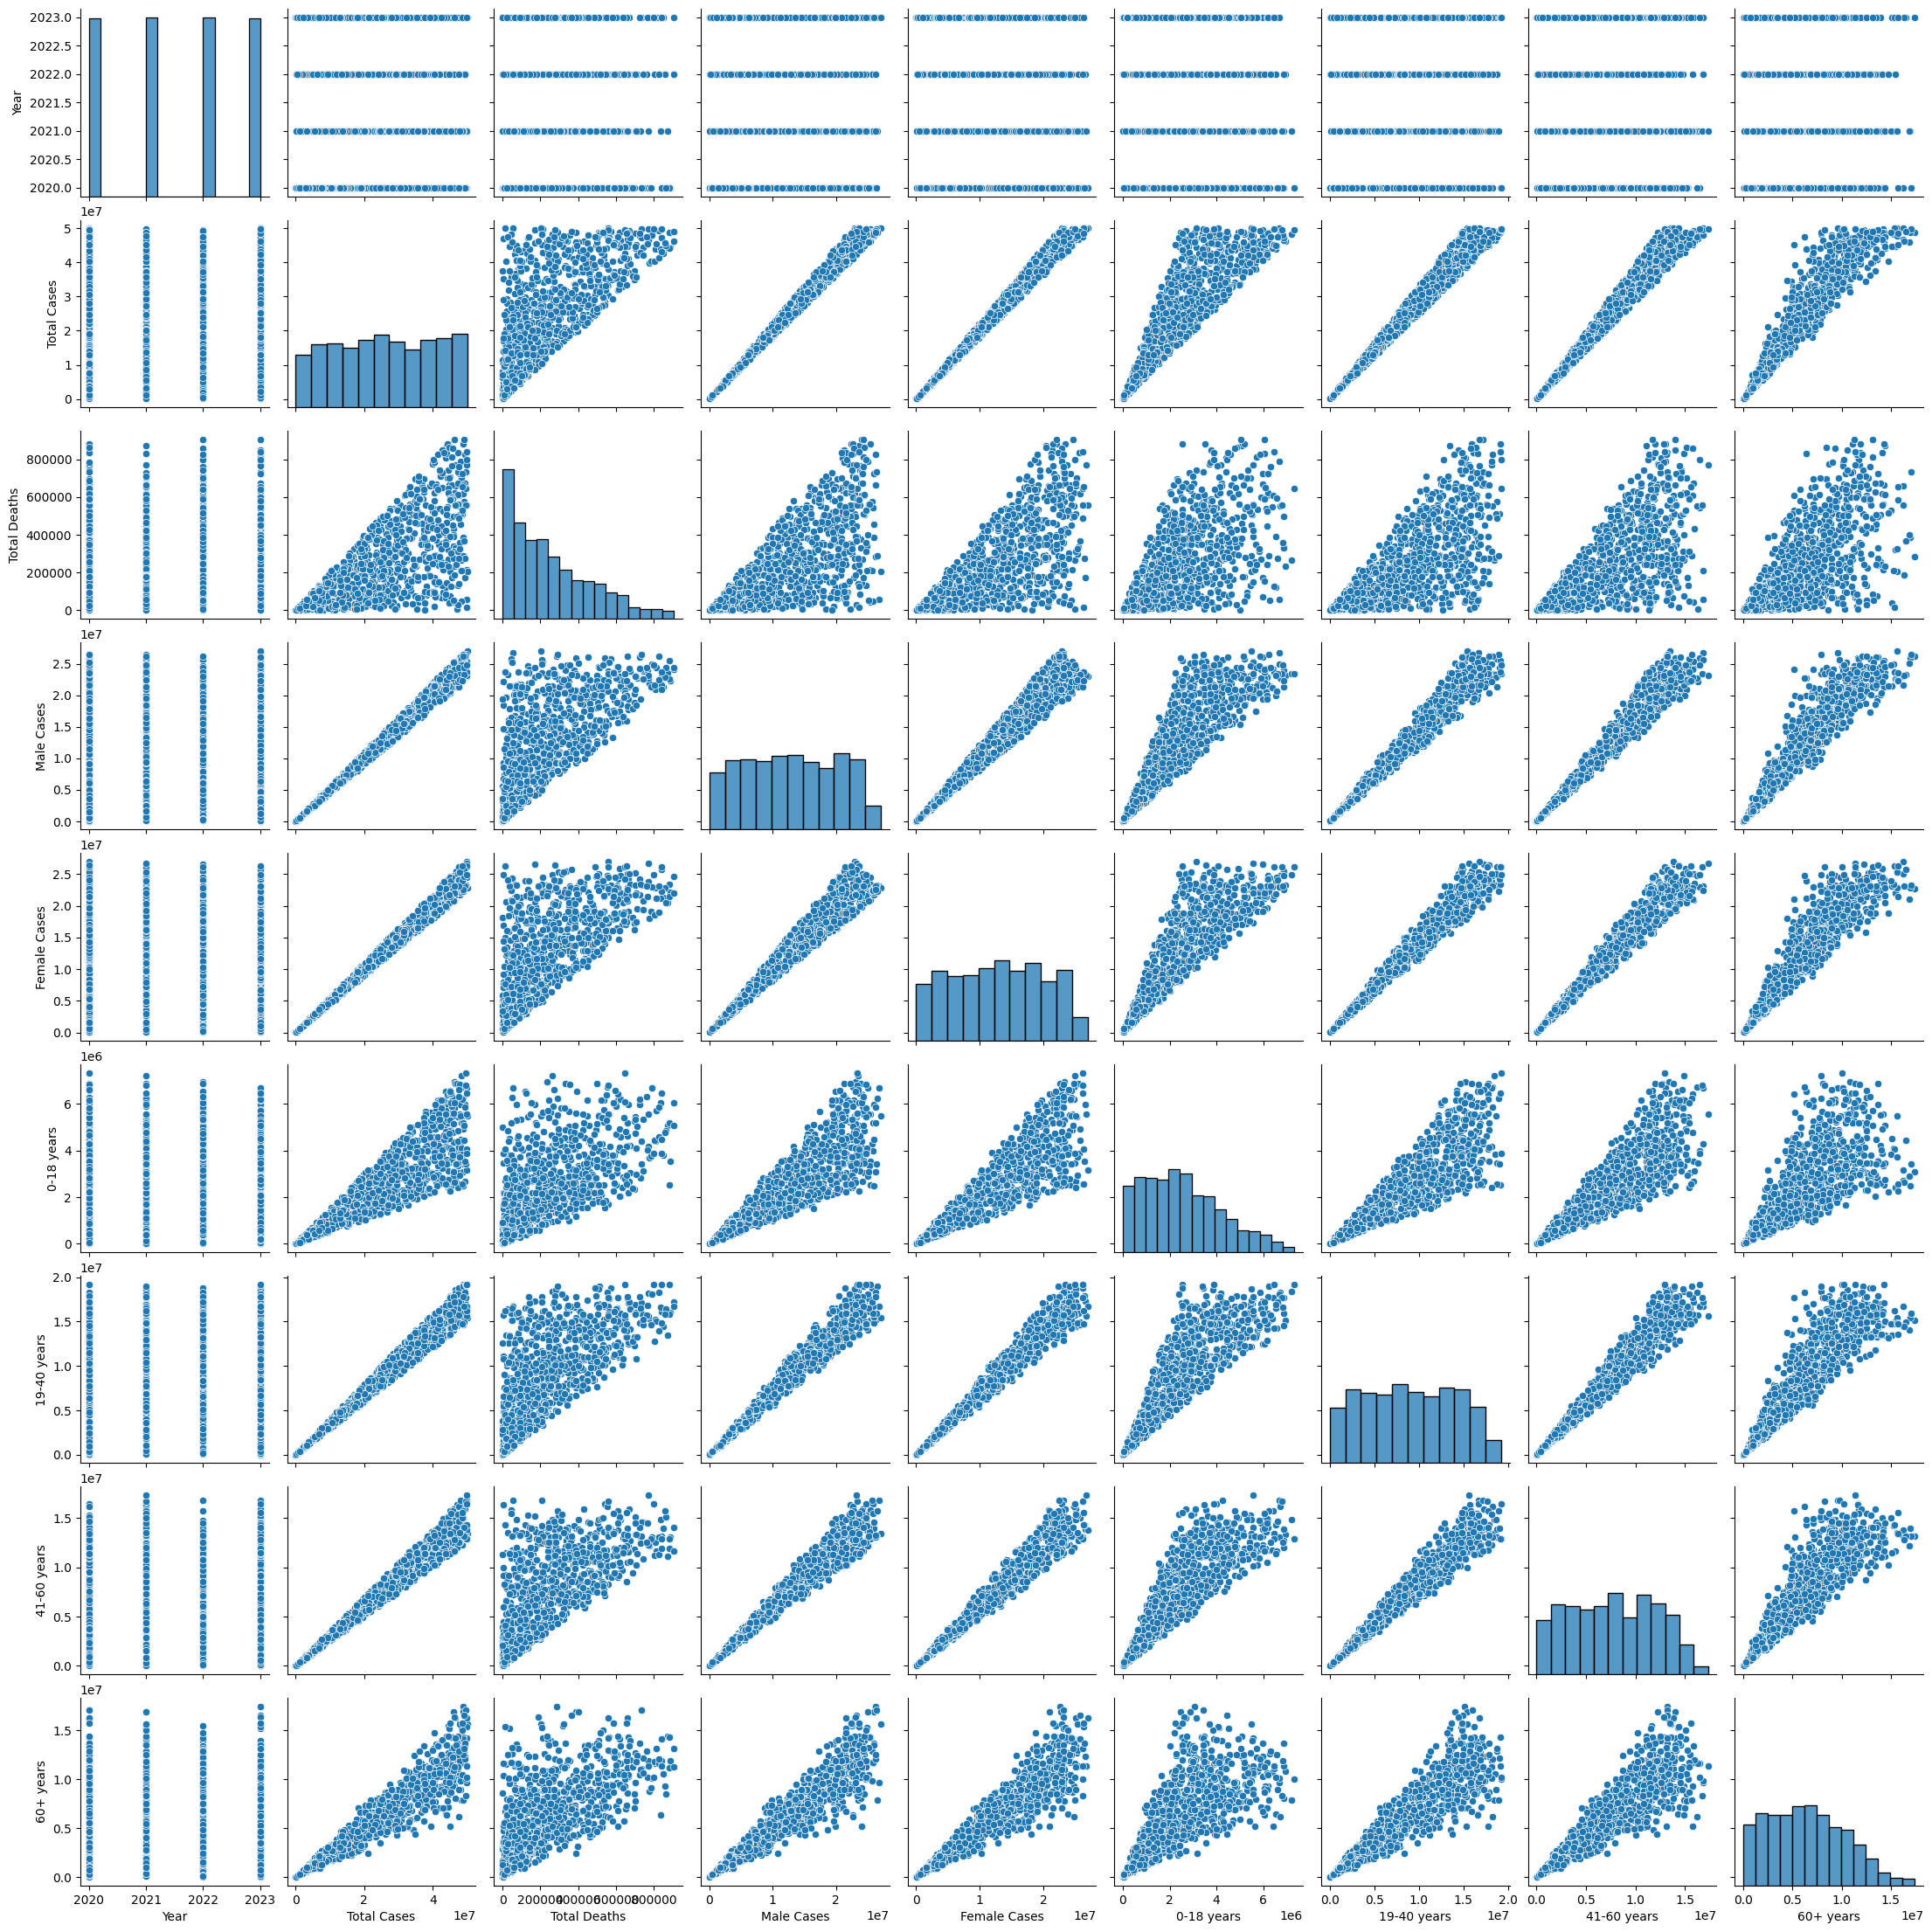

In [18]:
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.show()

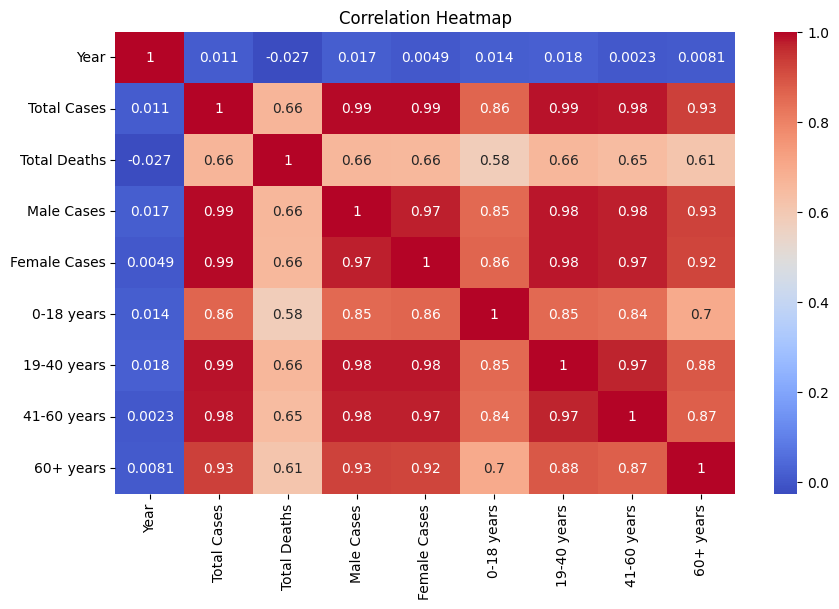

In [19]:
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

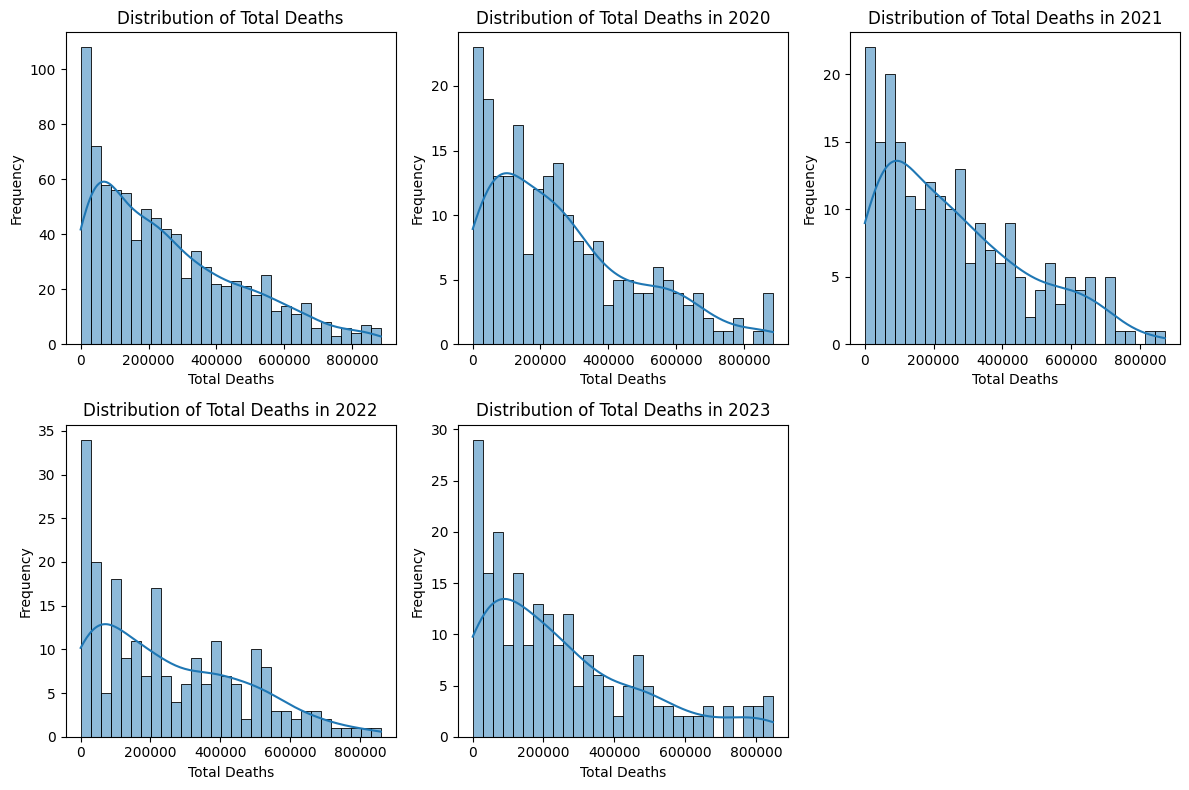

In [20]:
df = remove_outliers_zscore(df, 'Total Deaths')
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['Total Deaths'], bins=30, kde=True)
plt.title("Distribution of Total Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("Frequency")
years = [2020, 2021, 2022, 2023]
for i, year in enumerate(years):
    plt.subplot(2, 3, i+2)
    sns.histplot(df[df['Year'] == year]['Total Deaths'], bins=30, kde=True)
    plt.title(f"Distribution of Total Deaths in {year}")
    plt.xlabel("Total Deaths")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

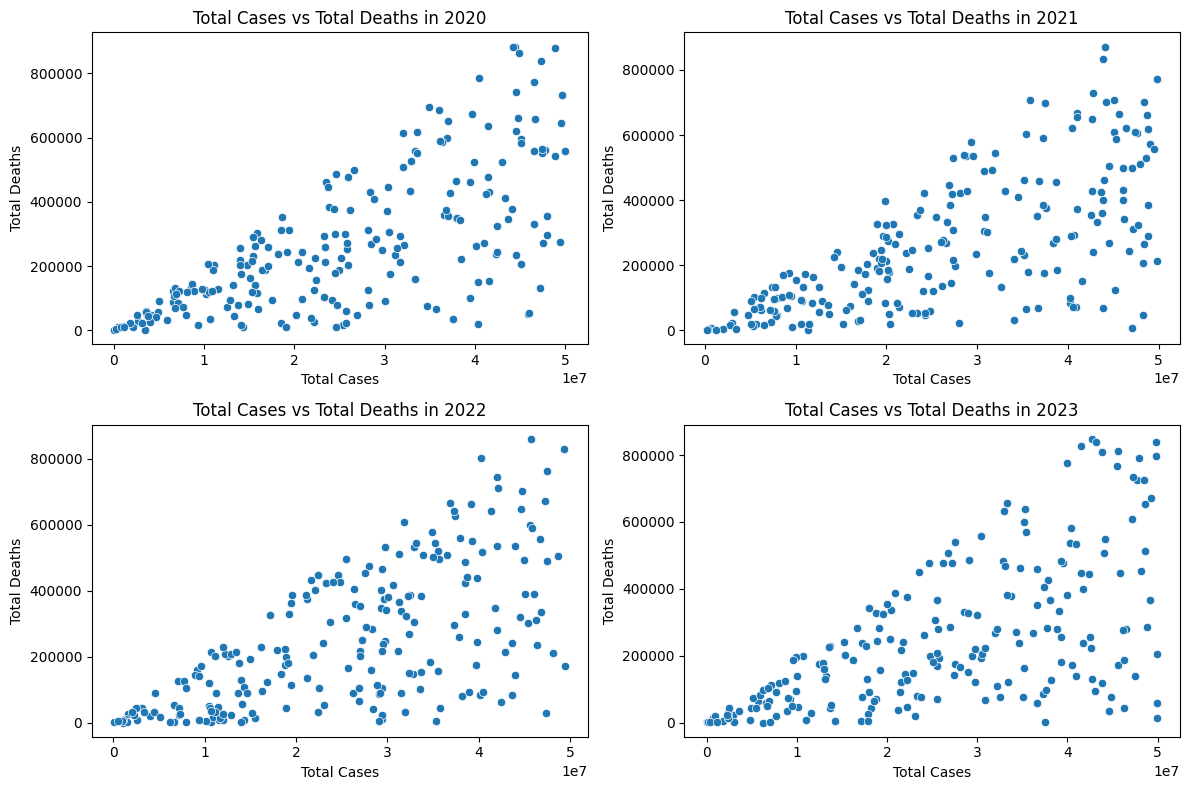

In [21]:
plt.figure(figsize=(12, 8))
years = [2020, 2021, 2022, 2023]
for i, year in enumerate(years):
    plt.subplot(2, 2, i+1)
    df_year = df[df['Year'] == year]
    sns.scatterplot(x=df_year['Total Cases'], y=df_year['Total Deaths'])
    plt.title(f"Total Cases vs Total Deaths in {year}")
    plt.xlabel("Total Cases")
    plt.ylabel("Total Deaths")

plt.tight_layout()
plt.show()

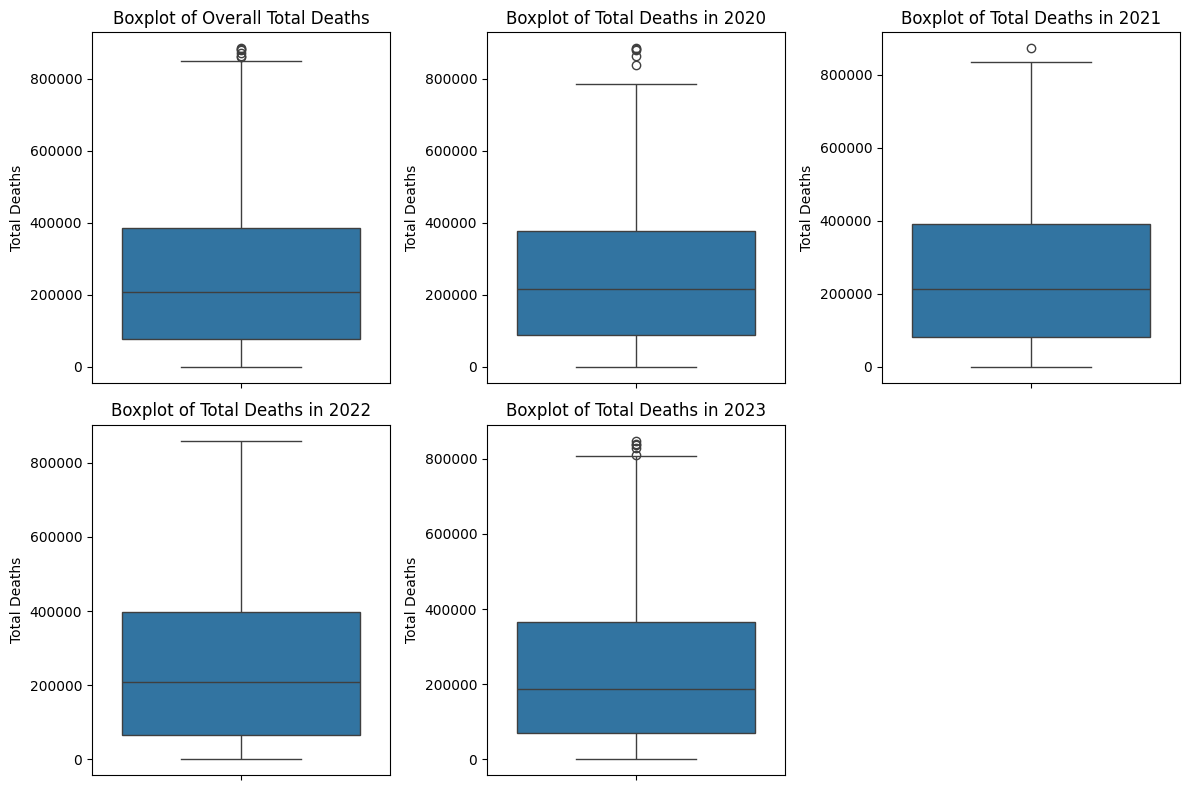

In [22]:
df = remove_outliers_zscore(df, 'Total Deaths')

# Create box plots
plt.figure(figsize=(12, 8))

# Box plot for Overall Total Deaths
plt.subplot(2, 3, 1)
sns.boxplot(y=df['Total Deaths'])
plt.title("Boxplot of Overall Total Deaths")
plt.ylabel("Total Deaths")

# Box plots for each year
years = [2020, 2021, 2022, 2023]
for i, year in enumerate(years):
    plt.subplot(2, 3, i+2)
    sns.boxplot(y=df[df['Year'] == year]['Total Deaths'])
    plt.title(f"Boxplot of Total Deaths in {year}")
    plt.ylabel("Total Deaths")

plt.tight_layout()
plt.show()

In [23]:
noise_factor = 0.5
y_train_reg_noisy = y_train_reg + np.random.normal(0, noise_factor * y_train_reg.std(), size=y_train_reg.shape)

reg_rf = RandomForestRegressor(n_estimators=200, random_state=42)
reg_rf.fit(X_train_reg, y_train_reg_noisy)
y_pred_reg_rf = reg_rf.predict(X_test_reg)
print("Random Forest Regression RMSE (with noise):", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_rf)))

reg_xgb = XGBRegressor()
reg_xgb.fit(X_train_reg, y_train_reg_noisy)
y_pred_reg_xgb = reg_xgb.predict(X_test_reg)
print("XGBoost Regression RMSE (with noise):", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_xgb)))

reg_svm = SVR(kernel='rbf', C=1)
reg_svm.fit(X_train_reg, y_train_reg_noisy)
y_pred_reg_svm = reg_svm.predict(X_test_reg)
print("SVM Regression RMSE (with noise):", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_svm)))


Random Forest Regression RMSE (with noise): 194203.25341517077
XGBoost Regression RMSE (with noise): 209496.71470455092
SVM Regression RMSE (with noise): 201369.55503789146


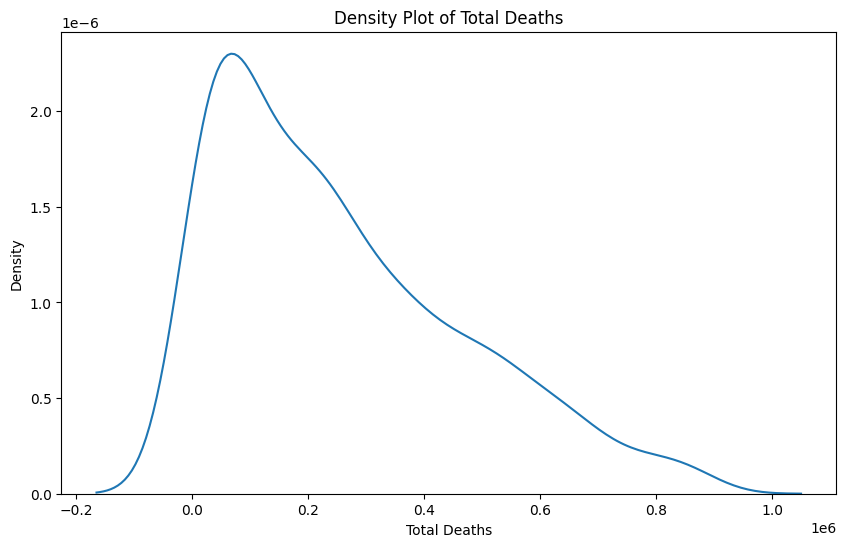

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Total Deaths']) # Use kdeplot for density plot
plt.title('Density Plot of Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Density')
plt.show()


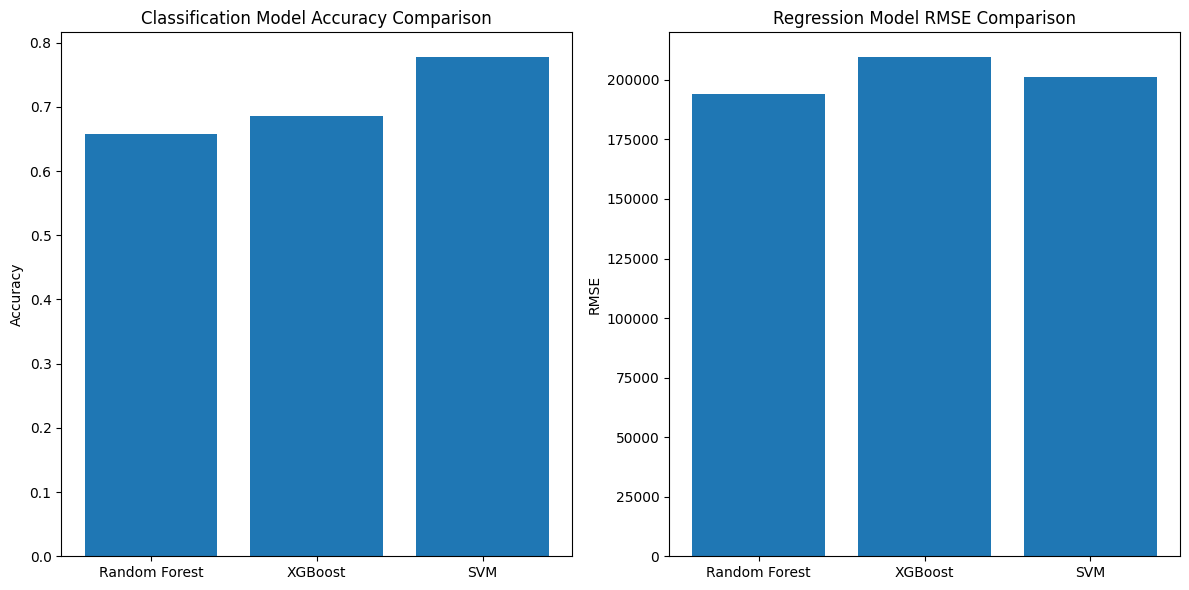

In [30]:
model_names = ['Random Forest', 'XGBoost', 'SVM']
classification_accuracy = [accuracy_score(y_test_cls, y_pred_cls_rf),
                           accuracy_score(y_test_cls, y_pred_cls_xgb),
                           accuracy_score(y_test_cls, y_pred_cls_svm)]
regression_rmse = [np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_rf)),
                   np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_xgb)),
                   np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_svm))]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, classification_accuracy)
plt.title('Classification Model Accuracy Comparison')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(model_names, regression_rmse)
plt.title('Regression Model RMSE Comparison')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()


In [31]:
from scipy.stats import ttest_ind
# Assuming you want to compare 'Total Deaths' between two groups (e.g., years 2020 and 2021)
group1 = df[df['Year'] == 2020]['Total Deaths']
group2 = df[df['Year'] == 2021]['Total Deaths']

t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


from statsmodels.stats.weightstats import ztest

# Example using ztest (requires data to be approximately normally distributed)
z_statistic, p_value_z = ztest(group1, group2)

print(f"Z-statistic: {z_statistic}")
print(f"P-value (z-test): {p_value_z}")


T-statistic: 0.2725601098144749
P-value: 0.7853207122589543
Z-statistic: 0.2725601098144749
P-value (z-test): 0.785191378996754
